# NETWORK ANAMOLY PREDICTION MODEL

## Machine Learning based Network Security Breach Prediction Model which analyzes data and identifies any breach in the network like infiltration, unauthorized access and more. 

#### Overview of Dataset

*Columns*

duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate
#### To predict
class
   * normal
   * anomaly

# Goal
The goal of this project is to build a machine learning model with highest accuracy and less error, which will predict the network intrusion based on the given inputs.

# Importing libraries and Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
train_data=pd.read_csv('/content/drive/MyDrive/colab_ntbk_2/ml_proj_dataset.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
train_data["protocol_type"].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

In [9]:
train_data["service"].value_counts()

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64

In [10]:
## finding categorical columns
num_cols = train_data._get_numeric_data().columns
  
cate_cols = list(set(train_data.columns)-set(num_cols))
cate_cols.remove('class')

  
cate_cols

['flag', 'service', 'protocol_type']

# Exploratory Data Analysis and Data Visualization:
Performing EDA on data can give meaning insights, discover patterns, detect outliers and can make assumptions with help of graphical representations.

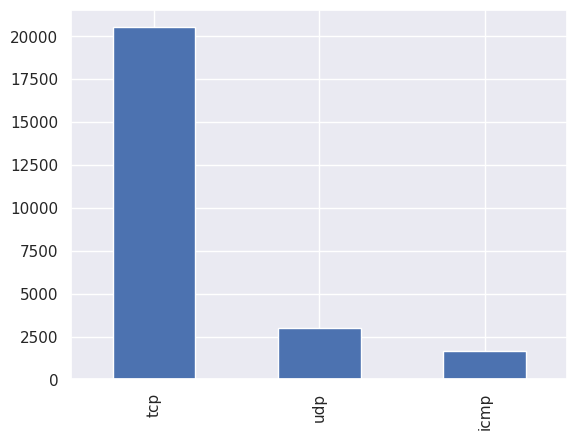

In [11]:
## Plotting different features

def bar_graph(feature):
    train_data[feature].value_counts().plot(kind="bar")
bar_graph('protocol_type')

## We can see that count of tcp is high and count and icmp is relatively low than udp

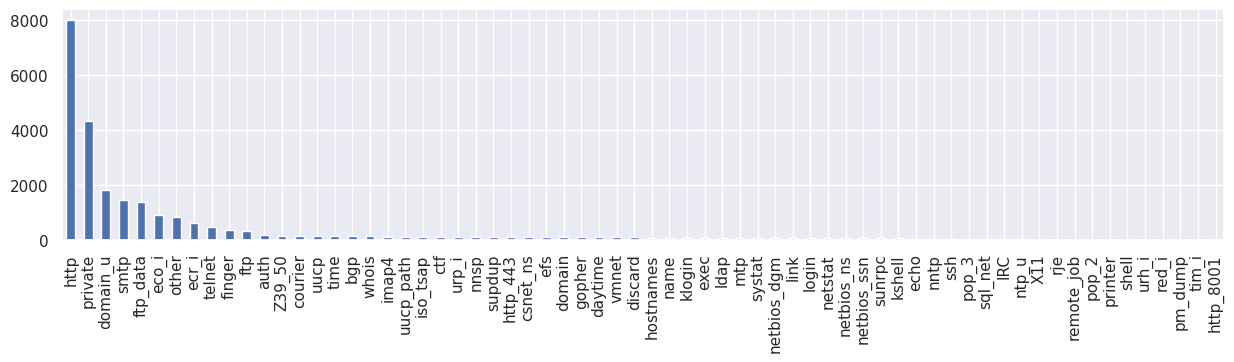

In [12]:
plt.figure(figsize=(15,3))
bar_graph('service')

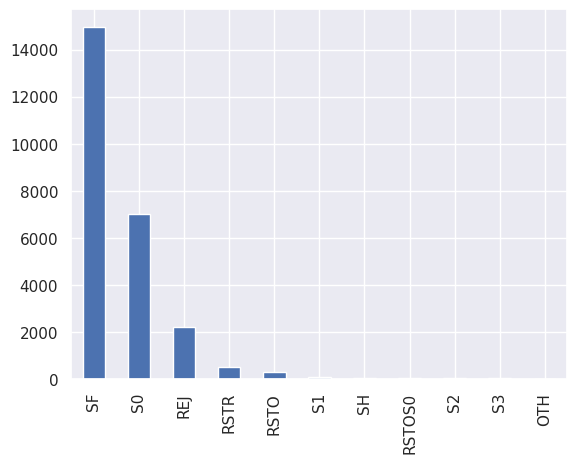

In [13]:
bar_graph('flag')

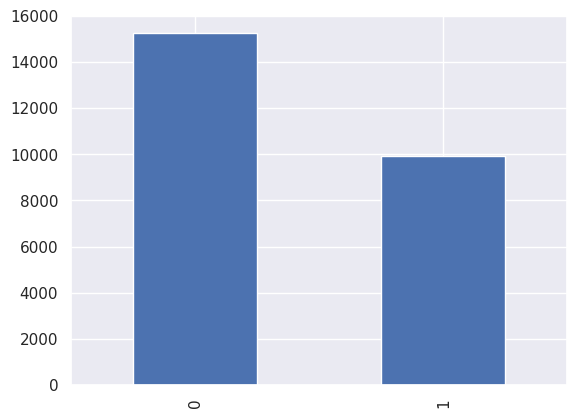

In [14]:
bar_graph('logged_in')

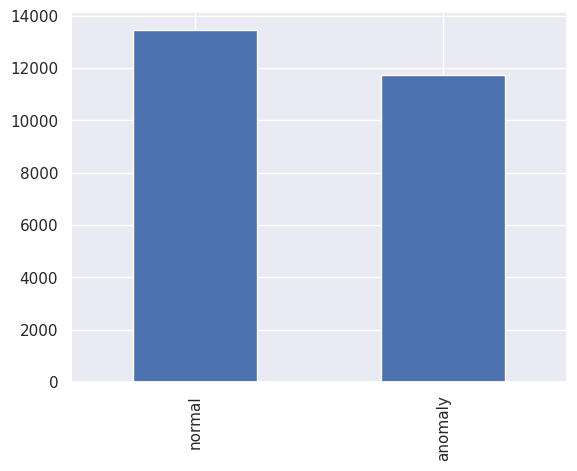

In [15]:
bar_graph('class')

## This class is what we are going to predict. The class normal and anamoly is almost equal. Hence the dataset is balanced.

# Correlation of Features

<ipython-input-16-fc118447fb84>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  train_data = train_data.dropna('columns')# drop columns with NaN
<ipython-input-16-fc118447fb84>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


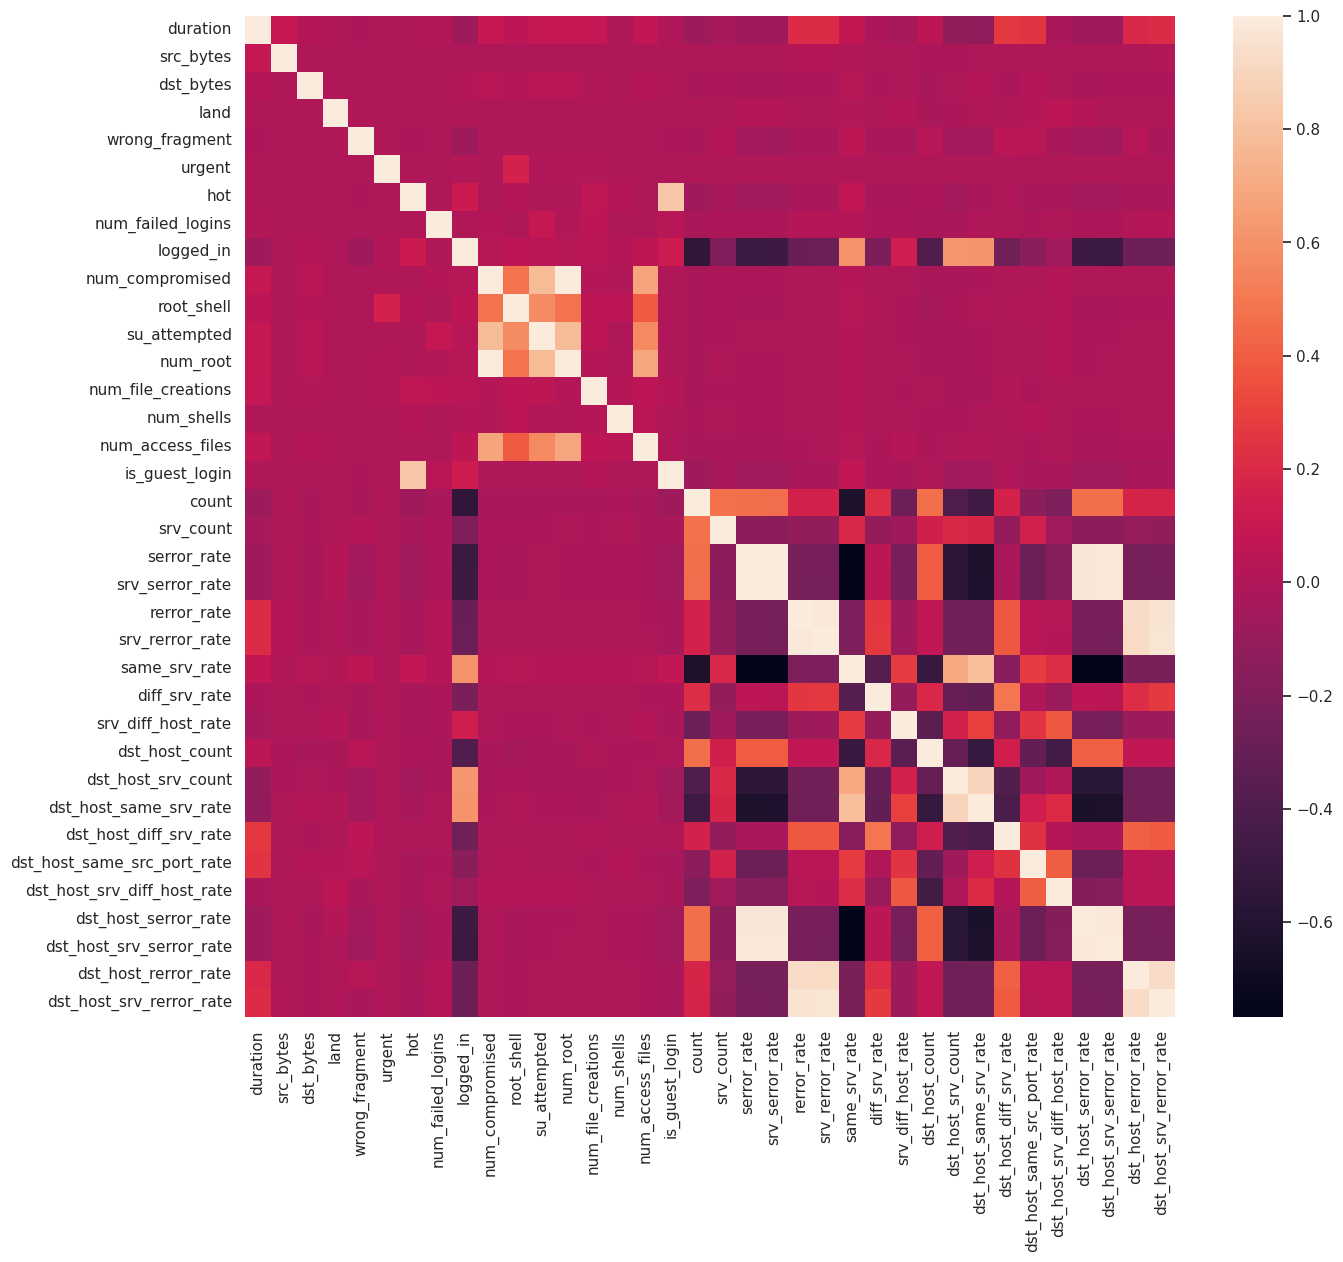

In [16]:
train_data = train_data.dropna('columns')# drop columns with NaN

train_data = train_data[[col for col in train_data if train_data[col].nunique() > 1]]

corr = train_data.corr()

plt.figure(figsize=(15,13))

sns.heatmap(corr)

plt.show()

In [17]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
train_data.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
train_data.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
train_data.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
train_data.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
train_data.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
train_data.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
train_data.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
train_data.drop('dst_host_same_srv_rate',axis = 1, inplace=True)


In [18]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal


In [19]:
train_data.shape

(25192, 32)

In [20]:
train_data['protocol_type'].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

# Feature Mapping for Categorical features

In [21]:

pmap = {'tcp':0,'udp':1,'icmp':2}
train_data['protocol_type'] = train_data['protocol_type'].map(pmap)

In [22]:
train_data['flag'].value_counts()

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64

In [23]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'S1':5 ,'SH':6 ,'RSTOS0':7,'S2':8,'S3':9 ,'OTH':10}
train_data['flag'] = train_data['flag'].map(fmap)

In [24]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,0,ftp_data,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal
1,0,1,other,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal
2,0,0,private,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,anomaly
3,0,0,http,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal
4,0,0,http,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal


In [25]:
train_data.drop('service',axis = 1,inplace= True)

In [26]:
train_data.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal
1,0,1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,anomaly
3,0,0,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal
4,0,0,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal


In [27]:
train_data.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

# Model Building
The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.

The models used are:

**XgBoost Classifier Algorithm** : XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework. The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.

**Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

**Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

**Gradient Boosting Algorithm** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

**AdaBoosting Algorithm** : AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.

**MLP Classifier Algorithm** : MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

**KNN algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

**Naive Bayes Algorithm** : Naive Bayes is a simple and fast method for predicting the category of a data set. Using it, multiple types of predictions can be made. When the independence assumption is valid, Naive Bayes is more capable than other algorithms. 


After visualization and data cleaning part, lets use these algorithms and predict the security breach in network. Then we are going to compare the accuracies of all models.

### Splitting data into training and test set
* Importing libraries
* Splitting X - independent data and y - dependent data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
y = train_data[['class']]
X = train_data.drop(['class'], axis=1)

In [30]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [31]:
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)
print(X_train.shape, X_test.shape)

(18894, 30) (6298, 30)


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
params={
    'learning_rate':[0.05,0.20,0.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
}

## 1. XGBoost Model

In [34]:
import xgboost as xgb

xgb.__version__

'1.7.5'

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [36]:
classifier = XGBClassifier()

#### Using RandomizedSearchCV for cross validation and finding best params fro prediction
* estimator : In this we have to pass the metric or the model for which we need to optimize the parameters.
* param_distributions : In this we have to pass the dictionary of parameters that we need to optimize.
* cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
* n_iter : This signifies the number of parameter settings that are sampled. By default it is set as 10.
* n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [38]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=1,cv=5,verbose=3)

In [39]:
random_search.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=1.000 total time=   1.4s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=1.000 total time=   1.3s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=1.000 total time=   1.4s
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=1.000 total time=   1.3s
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3;, score=1.000 total time=   1.3s
[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=1.000 total time=   4.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=7;, score=1.000 total time=   1.5s
[CV 3/5] END colsample_

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [40]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [42]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [43]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [44]:
y_pred = classifier.predict(X_test)
y_pred_temp = []
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        cl = 'anomaly'
        y_pred_temp.append(cl)
    else:
        cl= 'normal'
        y_pred_temp.append(cl)
    # print(cl)

print(y_pred)
print(y_pred_temp)
y_pred = np.array(y_pred_temp)
y_pred

[0 1 0 ... 0 1 0]
['anomaly', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'normal', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'anomaly', 'normal', 'normal', 'anomaly', 'normal', 'anomaly', 'an

array(['anomaly', 'normal', 'anomaly', ..., 'anomaly', 'normal',
       'anomaly'], dtype='<U7')

In [45]:
len(y_pred)

6298

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [47]:
y_pred

array(['anomaly', 'normal', 'anomaly', ..., 'anomaly', 'normal',
       'anomaly'], dtype='<U7')

In [48]:
confusion_matrix(y_test,y_pred)

array([[2979,   11],
       [   4, 3304]])

**Confusion matrix tells that we have more true positive predictions**

In [49]:
accuracy_score(y_test,y_pred)

0.9976182915211178

## 2. GaussianNB
## 3. KNeighborsClassifier
## 4. RandomForestClassifier
## 5. AdaBoostClassifier
## 6. GradientBoostingClassifier
## 7. MLPClassifier
## 8. DecisionTreeClassifier

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
models=[]
models.append(('Naive Bayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Gradient Boosting',GradientBoostingClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Multi-Layer Perceptron',MLPClassifier()))
models.append(('KNN', KNeighborsClassifier()))

### Automating results of many algorithms using functions

In [52]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    from sklearn.metrics import confusion_matrix,accuracy_score
    # print(confusion_matrix(predictions,y_test))
    # print('\n')
    # print(accuracy_score(predictions,y_test))
    # print('\n')

Naive Bayes
RandomForest
AdaBoost
Gradient Boosting
Decision Tree
Multi-Layer Perceptron


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


KNN


# Plotting and comparing the accuracy of all algorithms
We have deployed all the machine learning algorithms and different algorithms gave different accuracies.

<BarContainer object of 8 artists>

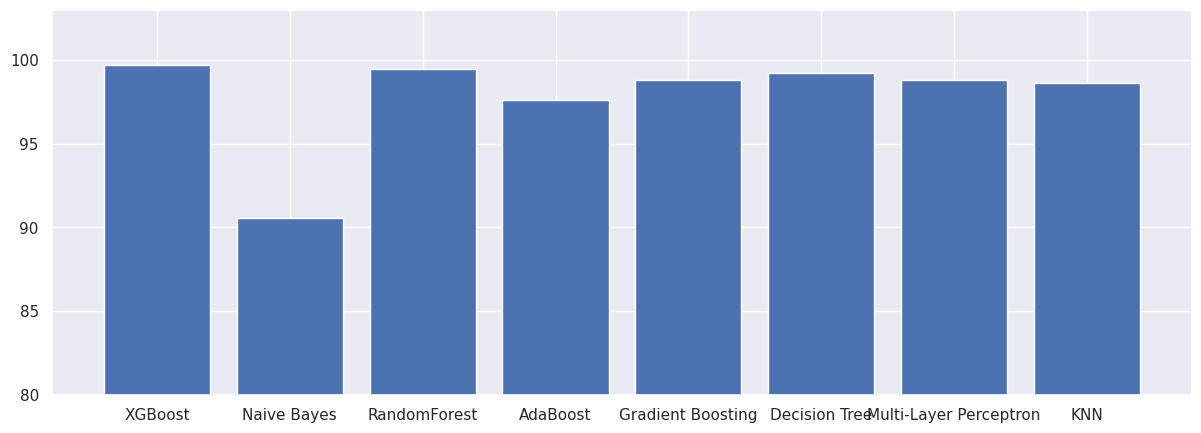

In [53]:
names= ['XGBoost',
'Naive Bayes',
'RandomForest',
'AdaBoost',
'Gradient Boosting',
'Decision Tree',
'Multi-Layer Perceptron',
'KNN']
values=[99.71419498253413,90.58431248015243,
99.4919021911718,97.58653540806606,
98.77738964750714,99.25373134328358,
98.77738964750714,98.61860908224833]
f = plt.figure(figsize=(50,5),num=10)
plt.subplot(131)
plt.ylim(80,103)
plt.bar(names,values)



gorithm                    |Accuracy            |
|:----------------------------|:-------------------|
|XGBoost                      |99.71419498253413   |
|Naive Bayes                  |90.58431248015243   |       
|RandomForest                 |99.4919021911718    |
|AdaBoost                     |97.58653540806606   |
|Gradient Boosting            |98,77738964750714   |
|Decision Tree                |99.25373134328358   |
|Multi-Layer Perceptron       |98.77738964750714   |
|KNN                          |98.61860908224833   |

From the above graph we can sonclude that XGBoost and Random Forest gave almost 99% accuracy followed by other algorithms.

### Models ranking -

1. XGBoost Classifier
2. Random Forest Classifier
3. Gradient Boosting 
4. MLP Classifier

# Saving the Model

In [54]:
import pickle

In [55]:
filename = 'network_security_breach_prediction_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

*Checking model condition, and it works perfectly*

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y = train_data[['class']]
X = train_data.drop(['class'], axis=1)
sc = MinMaxScaler()
X = sc.fit_transform(X)
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)
print(X_train.shape, X_test.shape)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
params={
    'learning_rate':[0.05,0.20,0.25],
    'max_depth':[5,8,10],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
}
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
classifier = XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=1,cv=5,verbose=3)
random_search.fit(X_train,y_train)
random_search.best_estimator_
random_search.best_params_
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred_temp = []
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        cl = 'anomaly'
        y_pred_temp.append(cl)
    else:
        cl= 'normal'
        y_pred_temp.append(cl)
    # print(cl)

print(y_pred)
print(y_pred_temp)
y_pred = np.array(y_pred_temp)
y_pred
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

(18894, 30) (6298, 30)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=1.000 total time=   3.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=1.000 total time=   2.4s
[CV 3/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=1.000 total time=   2.4s
[CV 4/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=1.000 total time=   5.2s
[CV 5/5] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1;, score=1.000 total time=   2.3s
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=1.000 total time=   0.9s
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=3;, score=1.000 total time=   0.9s
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=5, min_

0.9976182915211178